In [1]:
import pandas as pd
import scipy.io

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat('/fsx/homes/Mohamed.Imam@mbzuai.ac.ae/projects/TAAL/data/oxford_flowers/imagelabels.mat')

# Display the keys (variables) in the .mat file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'labels'])


In [6]:
print(mat_data['labels'])

[[77 77 77 ... 62 62 62]]


In [2]:
# df = pd.read_csv('/fsx/homes/Mohamed.Imam@mbzuai.ac.ae/projects/TAAL/data/oxford_flowers/oxford_flowers_pseudo_full_16shot.csv')
# df = pd.read_csv('/fsx/homes/Mohamed.Imam@mbzuai.ac.ae/projects/TAAL/data/eurosat/eurosat_training_set_zs_preds.csv')
# df = pd.read_csv('/fsx/homes/Mohamed.Imam@mbzuai.ac.ae/projects/TAAL/data/cifar100/cifar100_training_set_zs_preds.csv')
df = pd.read_csv('/fsx/homes/Mohamed.Imam@mbzuai.ac.ae/projects/TAAL/data/imagenet/imagenet_training_set_zs_preds.csv')
print(df.columns)
print(df.shape) 

Index(['Unnamed: 0', 'dataset', 'img_path', 'pred1', 'pred2', 'pred3', 'prob1',
       'prob2', 'prob3', 'correct', 'target'],
      dtype='object')
(1281167, 11)


In [3]:
# # df.hist(column='prob1', bins=102)
# # df[df['correct'] == 1].hist(column='prob1', bins=102)
# df2[df2['pred2'] == df2['target']].hist(column='prob2', bins=102)

In [4]:


def select_top_k_probs(pred_df, k):
    pseudo_df = pd.DataFrame()
    for pred_label in set(pred_df.target):
        sub_label_df = pred_df.loc[(pred_df.pred1 == pred_label)]
        sub_label_df = sub_label_df.sort_values('prob1', ascending=False).iloc[0:k]


        if len(sub_label_df) == 0:
            sub_label_df = pred_df.loc[(pred_df.pred2 == pred_label)]
            sub_label_df = sub_label_df.sort_values('prob2', ascending=False).iloc[0:k]
            sub_label_df['pred1'] = sub_label_df['pred2']
            print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
            if len(sub_label_df) == 0:
                sub_label_df = pred_df.loc[(pred_df.pred3 == pred_label)]
                sub_label_df = sub_label_df.sort_values('prob3', ascending=False).iloc[0:k]
                sub_label_df['pred1'] = sub_label_df['pred3']
                print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
                if len(sub_label_df) == 0:
                    raise NotImplementedError
        pseudo_df = pd.concat((pseudo_df, sub_label_df))
    return pseudo_df


In [5]:


def always_select_top_k_probs(pred_df, k):
    pseudo_df = pd.DataFrame()
    for pred_label in set(pred_df.target):
        sub_label_df = pred_df.loc[(pred_df.pred1 == pred_label)]
        sub_label_df = sub_label_df.sort_values('prob1', ascending=False).iloc[0:k]

        if len(sub_label_df) < k:
            required = k - len(sub_label_df)
            sub_label_df_2 = pred_df.loc[(pred_df.pred2 == pred_label)]
            sub_label_df_2 = sub_label_df_2.sort_values('prob2', ascending=False).iloc[0:(required)]
            sub_label_df = pd.concat((sub_label_df, sub_label_df_2))
            sub_label_df['pred1'] = sub_label_df['pred2']
            # print(f'For label {pred_label}, {len(sub_label_df)} rows selected')

            if len(sub_label_df) < k:
                required = k - len(sub_label_df)
                sub_label_df_3 = pred_df.loc[(pred_df.pred3 == pred_label)]
                sub_label_df_3 = sub_label_df_3.sort_values('prob3', ascending=False).iloc[0:required]
                sub_label_df = pd.concat((sub_label_df, sub_label_df_3))
                sub_label_df['pred1'] = sub_label_df['pred3']
                # print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
                if len(sub_label_df) == 0:
                    raise NotImplementedError
        pseudo_df = pd.concat((pseudo_df, sub_label_df))
    return pseudo_df


In [16]:

def select_top_k_probs_drop_dups(pred_df, k):
    pseudo_df = pd.DataFrame()
    for pred_label in set(pred_df.target):
        sub_label_df = pred_df.loc[(pred_df.pred1 == pred_label)]
        sub_label_df = sub_label_df.sort_values('prob1', ascending=False).iloc[0:k]


        if len(sub_label_df) == 0:
            sub_label_df = pred_df.loc[(pred_df.pred2 == pred_label)]
            sub_label_df = sub_label_df.sort_values('prob2', ascending=False).iloc[0:k]
            sub_label_df['pred1'] = sub_label_df['pred2']
            print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
            if len(sub_label_df) == 0:
                sub_label_df = pred_df.loc[(pred_df.pred3 == pred_label)]
                sub_label_df = sub_label_df.sort_values('prob3', ascending=False).iloc[0:k]
                sub_label_df['pred1'] = sub_label_df['pred3']
                print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
                if len(sub_label_df) == 0:
                    raise NotImplementedError
        pseudo_df = pd.concat((pseudo_df, sub_label_df))
    pseudo_df.drop_duplicates(subset='img_path', inplace=True)
    return pseudo_df

In [ ]:

def select_top_k_probs_most_confident(pred_df, k):
    pseudo_df = pd.DataFrame()
    pred_df['prob1_prob2_diff'] = pred_df['prob1'] - pred_df['prob2']
    for pred_label in set(pred_df.target):
        sub_label_df = pred_df.loc[(pred_df.pred1 == pred_label)]
        # sub_label_df = sub_label_df.sort_values('prob1', ascending=False).iloc[0:k]
        sub_label_df = sub_label_df.sort_values(by = ['prob1_prob2_diff', 'prob1'], ascending = [False, False]).iloc[0:k]

        if len(sub_label_df) == 0:
            sub_label_df = pred_df.loc[(pred_df.pred2 == pred_label)]
            sub_label_df = sub_label_df.sort_values('prob2', ascending=False).iloc[0:k]
            sub_label_df['pred1'] = sub_label_df['pred2']
            print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
            if len(sub_label_df) == 0:
                sub_label_df = pred_df.loc[(pred_df.pred3 == pred_label)]
                sub_label_df = sub_label_df.sort_values('prob3', ascending=False).iloc[0:k]
                sub_label_df['pred1'] = sub_label_df['pred3']
                print(f'For label {pred_label}, {len(sub_label_df)} rows selected')
                if len(sub_label_df) == 0:
                    raise NotImplementedError
        pseudo_df = pd.concat((pseudo_df, sub_label_df))
    return pseudo_df


In [18]:

def select_top_k_probs_min_max(pred_df, k):
    pseudo_df = pd.DataFrame()
    grouped_dict = pred_df.groupby('pred1')['prob1'].mean().to_dict()
    pred_df['avg']=pred_df['pred1'].map(grouped_dict)
    pred_df['avg'] = pred_df['avg']*0.99
    pred_df['prob1_prob2_diff'] = pred_df['prob1'] - pred_df['prob2']
    for pred_label in set(pred_df.target):
        sub_label_df = pred_df.loc[(pred_df.pred1 == pred_label) & (pred_df.prob1 >= pred_df.avg)]
        sub_label_df = sub_label_df.sort_values('prob1', ascending=False).iloc[0:k]

        if (len(sub_label_df) < k):
            rows_to_select = len(k//2)
        elif (len(sub_label_df) >= k):
            rows_to_select = k
        sub_label_df = sub_label_df.head(rows_to_select)
        pseudo_df = pd.concat((pseudo_df, sub_label_df))
    return pseudo_df


In [7]:
def top_3_accuracy(pred_df):
    return (pred_df[pred_df['pred1'] == pred_df['target']].shape[0] + 
            pred_df[pred_df['pred2'] == pred_df['target']].shape[0] + 
            pred_df[pred_df['pred3'] == pred_df['target']].shape[0]) / pred_df.shape[0]

def top_1_accuracy(pred_df):
    return (pred_df[pred_df['pred1'] == pred_df['target']].shape[0] / pred_df.shape[0])

In [15]:
nos_pls = 32

# pseudo_preds = select_top_k_probs(df, nos_pls)
# print(top_3_accuracy(pseudo_preds))
# print(top_1_accuracy(pseudo_preds))
# print()
pseudo_preds = select_top_k_probs_drop_dups(df, nos_pls)
print(top_3_accuracy(pseudo_preds))
print(top_1_accuracy(pseudo_preds))
print()

0.74690625
0.68803125

0.7445625
0.6876875



In [19]:
pseudo_preds = select_top_k_probs_min_max(df, nos_pls)
print(top_3_accuracy(pseudo_preds))
print(top_1_accuracy(pseudo_preds))
print()

0.74728125
0.6880625



In [12]:
pseudo_preds['pred1'].value_counts()

canna lily                  16
siam tulip                  16
english marigold            16
colt's foot                 16
great masterwort            16
                            ..
silverbush                  11
oxeye daisy                 10
prince of wales feathers     6
ball moss                    5
watercress                   1
Name: pred1, Length: 102, dtype: int64

<Axes: >

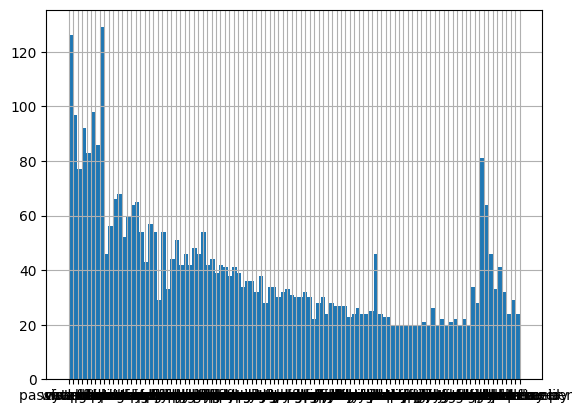

In [48]:
df2['target'].hist(bins=102)